In [1]:
import os
__print__ = print
def print(string):
    os.system(f'echo \"{string}\"')
    __print__(string)

In [2]:
! pip install pytorch-transformers

     |████████████████████████████████| 176 kB 5.4 MB/s 
     |████████████████████████████████| 1.2 MB 39.9 MB/s 
     |████████████████████████████████| 895 kB 34.6 MB/s 
     |████████████████████████████████| 131 kB 51.2 MB/s 
     |████████████████████████████████| 8.0 MB 48.8 MB/s 
     |████████████████████████████████| 79 kB 6.7 MB/s 
     |████████████████████████████████| 138 kB 51.4 MB/s 
     |████████████████████████████████| 127 kB 49.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
!pip install fastcore==1.0.9

In [4]:
!pip install transformers

     |████████████████████████████████| 2.9 MB 5.2 MB/s 
     |████████████████████████████████| 3.3 MB 36.4 MB/s 
     |████████████████████████████████| 56 kB 5.2 MB/s 
     |████████████████████████████████| 596 kB 46.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
!pip install chart_studio
!pip install scikit-plot

     |████████████████████████████████| 64 kB 1.8 MB/s 


In [7]:
from fastai.text import *
from fastai.metrics import *
from transformers import RobertaTokenizer

In [8]:
# Creating a config object to store task specific information
class Config(dict):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        for k, v in kwargs.items():
            setattr(self, k, v)
    
    def set(self, key, val):
        self[key] = val
        setattr(self, key, val)
        
config = Config(
    testing=False,
    seed = 2019,
    roberta_model_name='roberta-base', # can also be exchnaged with roberta-large 
    max_lr=1e-5,
    epochs=6,
    use_fp16=False,
    bs=16, 
    max_seq_len=256, 
    num_labels = 2,
    hidden_dropout_prob=.05,
    hidden_size=768, # 1024 for roberta-large
    start_tok = "<s>",
    end_tok = "</s>",
)

In [9]:
import pandas as pd
import io
import os

In [10]:
#importing libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import statistics
import math
import os
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re
pd.set_option('max_colwidth', 800)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [11]:
# importing deep learning libraries
import tqdm

In [12]:
#loading dataset
df=pd.read_csv('/content/train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [13]:
#loading dataset
df1=pd.read_csv('/content/test.csv')
df1.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [14]:
df.drop(['id', 'keyword', 'location'], axis = 1, inplace=True)
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,"13,000 people receive #wildfires evacuation orders in California",1
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [15]:
df1.drop(['id', 'keyword', 'location'], axis = 1, inplace=True)
df1.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, stay safe everyone."
2,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [16]:
# Cleaning Raw tweets
def clean_text(text):
    
    #remove emails
    text = ' '.join([i for i in text.split() if '@' not in i])
    
    #remove web address
    text = re.sub('http[s]?://\S+', '', text)

    #remove brackets and parantheses (and removing the text inside the brackets and parantheses)
    text = re.sub("[\(\[].*?[\)\]]", "", text)

    #remove punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    
    #Filter to allow only alphabets and numbers
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    #remove double spaces 
    text = re.sub('\s+', ' ', text)
    
    return text

In [17]:
# applying that into function.
df["clean_text"] = df['text'].apply(lambda x: clean_text(x))
df.head(10)

,text,target,clean_text
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,Our Deeds are the Reason of this earthquake May ALLAH Forgive us all
1,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected
3,"13,000 people receive #wildfires evacuation orders in California",1,people receive wildfires evacuation orders in California
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school
5,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,RockyFire Update California Hwy closed in both directions due to Lake County fire CAfire wildfires
6,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,flood disaster Heavy rain causes flash flooding of streets in Manitou Colorado Springs areas
7,I'm on top of the hill and I can see a fire in the woods...,1,I m on top of the hill and I can see a fire in the woods
8,There's an emergency evacuation happening now in the building across the street,1,There s an emergency evacuation happening now in the building across the street
9,I'm afraid that the tornado is coming to our area...,1,I m afraid that the tornado is coming to our area


In [18]:
# applying that into function.
df1["clean_text"] = df1['text'].apply(lambda x: clean_text(x))
df1.head(10)

,text,clean_text
0,Just happened a terrible car crash,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, stay safe everyone.",Heard about earthquake is different cities stay safe everyone
2,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",there is a forest fire at spot pond geese are fleeing across the street I cannot save them all
3,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting Spokane wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills in China and Taiwan
5,We're shaking...It's an earthquake,We re shaking It s an earthquake
6,"They'd probably still show more life than Arsenal did yesterday, eh? EH?",They d probably still show more life than Arsenal did yesterday eh EH
7,Hey! How are you?,Hey How are you
8,What a nice hat?,What a nice hat
9,Fuck off!,Fuck off


In [19]:
# dropping the uncleaned text column "text"
df = df.drop(['text'], axis=1)
df1 = df1.drop(['text'], axis=1)

In [20]:
# renaming the column
df.rename(columns = {'clean_text':'text'}, inplace = True)
df.head()

,target,text
0,1,Our Deeds are the Reason of this earthquake May ALLAH Forgive us all
1,1,Forest fire near La Ronge Sask Canada
2,1,All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected
3,1,people receive wildfires evacuation orders in California
4,1,Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school


In [21]:
# renaming the column
df1.rename(columns = {'clean_text':'text'}, inplace = True)
df1.head()

,text
0,Just happened a terrible car crash
1,Heard about earthquake is different cities stay safe everyone
2,there is a forest fire at spot pond geese are fleeing across the street I cannot save them all
3,Apocalypse lighting Spokane wildfires
4,Typhoon Soudelor kills in China and Taiwan


In [22]:
df1.to_csv('test1.csv', index=False)

In [23]:
x = df['text']
y = df['target']

In [24]:
feat_cols = "text"
label_cols = "target"

In [25]:
feat_cols1 = "text"

In [26]:
class FastAiRobertaTokenizer(BaseTokenizer):
    """Wrapper around RobertaTokenizer to be compatible with fastai"""
    def __init__(self, tokenizer: RobertaTokenizer, max_seq_len: int=128, **kwargs): 
        self._pretrained_tokenizer = tokenizer
        self.max_seq_len = max_seq_len 
    def __call__(self, *args, **kwargs): 
        return self 
    def tokenizer(self, t:str) -> List[str]: 
        """Adds Roberta bos and eos tokens and limits the maximum sequence length""" 
        return [config.start_tok] + self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2] + [config.end_tok]

In [27]:
# create fastai tokenizer for roberta
from transformers import RobertaTokenizer
roberta_tok = RobertaTokenizer.from_pretrained("roberta-base")

fastai_tokenizer = Tokenizer(tok_func=FastAiRobertaTokenizer(roberta_tok, max_seq_len=config.max_seq_len), 
                             pre_rules=[], post_rules=[])

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [28]:
roberta_tok

PreTrainedTokenizer(name_or_path='roberta-base', vocab_size=50265, model_max_len=512, is_fast=False, padding_side='right', special_tokens={'bos_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'sep_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad_token': AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'cls_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True)})

In [29]:
import json
path = F"/content/roberta_models"

In [30]:
roberta_tok.save_vocabulary(path)

('/content/roberta_models/vocab.json', '/content/roberta_models/merges.txt')

In [31]:
os.chdir("/content/roberta_models")
os.listdir()

['merges.txt', 'vocab.json']

In [32]:
# create fastai vocabulary for roberta

with open('vocab.json', 'r', encoding='utf-8') as f:
    roberta_vocab_dict = json.load(f)

In [33]:
fastai_roberta_vocab = Vocab(list(roberta_vocab_dict.keys()))

In [34]:
fastai_roberta_vocab

In [35]:
# Setting up pre-processors
class RobertaTokenizeProcessor(TokenizeProcessor):
    def __init__(self, tokenizer):
         super().__init__(tokenizer=tokenizer, include_bos=False, include_eos=False)

class RobertaNumericalizeProcessor(NumericalizeProcessor):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, vocab=fastai_roberta_vocab, **kwargs)


def get_roberta_processor(tokenizer:Tokenizer=None, vocab:Vocab=None):
    """
    Constructing preprocessors for Roberta
    We remove sos and eos tokens since we add that ourselves (OUR OWN DATA) in the tokenizer.
    We also use a custom vocabulary to match the numericalization with the original Roberta model.
    """
    return [RobertaTokenizeProcessor(tokenizer=tokenizer), NumericalizeProcessor(vocab=vocab)]

In [36]:
# Creating a Roberta specific DataBunch class
class RobertaDataBunch(TextDataBunch):
    "Create a `TextDataBunch` suitable for training Roberta"
    @classmethod
    def create(cls, train_ds, valid_ds, test_ds=None, path:PathOrStr='.', bs:int=64, val_bs:int=None, pad_idx=1,
               pad_first=True, device:torch.device=None, no_check:bool=False, backwards:bool=False, 
               dl_tfms:Optional[Collection[Callable]]=None, **dl_kwargs) -> DataBunch:
        "Function that transform the `datasets` in a `DataBunch` for classification. Passes `**dl_kwargs` on to `DataLoader()`"
        datasets = cls._init_ds(train_ds, valid_ds, test_ds)
        val_bs = ifnone(val_bs, bs)
        collate_fn = partial(pad_collate, pad_idx=pad_idx, pad_first=pad_first, backwards=backwards)
        train_sampler = SortishSampler(datasets[0].x, key=lambda t: len(datasets[0][t][0].data), bs=bs)
        train_dl = DataLoader(datasets[0], batch_size=bs, sampler=train_sampler, drop_last=True, **dl_kwargs)
        dataloaders = [train_dl]
        for ds in datasets[1:]:
            lengths = [len(t) for t in ds.x.items]
            sampler = SortSampler(ds.x, key=lengths.__getitem__)
            dataloaders.append(DataLoader(ds, batch_size=val_bs, sampler=sampler, **dl_kwargs))
        return cls(*dataloaders, path=path, device=device, dl_tfms=dl_tfms, collate_fn=collate_fn, no_check=no_check)

In [37]:
class RobertaTextList(TextList):
    _bunch = RobertaDataBunch
    _label_cls = TextList

In [38]:
import concurrent.futures

# loading the tokenizer and vocab processors
processor = get_roberta_processor(tokenizer=fastai_tokenizer, vocab=fastai_roberta_vocab)

In [39]:
processor

In [41]:
# creating our databunch 
data = RobertaTextList.from_df(df, ".", cols=feat_cols, processor=processor) \
    .split_by_rand_pct(seed=config.seed) \
    .label_from_df(cols=label_cols,label_cls=CategoryList) \
    .add_test(RobertaTextList.from_df(df1, ".", cols=feat_cols1, processor=processor)) \
    .databunch(bs=config.bs, pad_first=False, pad_idx=0)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [42]:
data

RobertaDataBunch;

Train: LabelList (6091 items)
x: RobertaTextList
<s> Our ĠDe eds Ġare Ġthe ĠReason Ġof Ġthis Ġearthquake ĠMay ĠALL AH ĠFor give Ġus Ġall </s>,<s> Forest Ġfire Ġnear ĠLa ĠRon ge ĠSask ĠCanada </s>,<s> All Ġresidents Ġasked Ġto Ġshelter Ġin Ġplace Ġare Ġbeing Ġnotified Ġby Ġofficers ĠNo Ġother Ġevacuation Ġor Ġshelter Ġin Ġplace Ġorders Ġare Ġexpected </s>,<s> Ġpeople Ġreceive Ġwildfires Ġevacuation Ġorders Ġin ĠCalifornia </s>,<s> Just Ġgot Ġsent Ġthis Ġphoto Ġfrom ĠRuby ĠAlaska Ġas Ġsmoke Ġfrom Ġwildfires Ġp ours Ġinto Ġa Ġschool </s>
y: CategoryList
1,1,1,1,1
Path: .;

Valid: LabelList (1522 items)
x: RobertaTextList
<s> Ty ph oon ĠS oud el or Ġtaking Ġdead Ġaim Ġat ĠTaiwan Ġ </s>,<s> End ed Ġtoday Ġs Ġstaff Ġmeeting Ġwith Ġthe Ġteacher Ġversion Ġof ĠI ĠWill ĠSurvive Ġto ot rue Ġ </s>,<s> S ustain ability ĠTask ĠForce ĠPresents ĠLevy Ġto ĠFund ĠEmergency ĠServices ĠWD TV Ġ </s>,<s> He ather ĠNight Ġand ĠAv a ĠSp ar xxx Ġenjoy Ġa Ġwild Ġteen Ġth re esome ĠView Ġand Ġ

In [43]:
import torch.nn as nn
from transformers import RobertaModel

# defining our model architecture 
class CustomRobertaModel(nn.Module):
    def __init__(self,num_labels=2):
        super(CustomRobertaModel,self).__init__()
        self.num_labels = num_labels
        self.roberta = RobertaModel.from_pretrained(config.roberta_model_name)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, num_labels) # defining final output layer
        
    def forward(self, input_ids, token_type_ids=None, attention_mask=None, labels=None):
        _ , pooled_output = self.roberta(input_ids, token_type_ids, attention_mask, return_dict=False) # 
        logits = self.classifier(pooled_output)        
        return logits

In [44]:
#Initialize the model
roberta_model = CustomRobertaModel(num_labels=config.num_labels)

learn = Learner(data, roberta_model, metrics=[accuracy])

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [45]:
learn.model.roberta.train() # setting roberta to train as it is in eval mode by default
learn.fit_one_cycle(config.epochs, max_lr=config.max_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.480950,0.408643,0.832457,01:32
1,0.416419,0.380352,0.841656,01:28
2,0.339116,0.405080,0.839685,01:29
3,0.307385,0.388817,0.844941,01:35
4,0.241354,0.432704,0.836399,01:33
5,0.206473,0.450809,0.844284,01:31


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [46]:
learn.model.roberta.eval()

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Drop

In [47]:
learn.show_results()

text,target,prediction
<s> I ĠH ATE ĠWHEN ĠIM ĠTR YING ĠTO ĠST RA IGHT EN ĠMY ĠHA IR ĠAND ĠMY ĠBR OTHER ĠCOM ES ĠSW O OP ING ĠIN ĠBE H IND ĠME ĠAND ĠSC AR ES ĠME ĠI ĠJUST ĠB URN ED ĠMY ĠF ING ER </s>,0,0
<s> I ĠM ĠLA UGH ING ĠIN ĠTHE ĠFACE ĠOF ĠCAS UAL T IES ĠAND ĠS OR R OW ĠTHE ĠFIRST ĠTIME ĠI ĠM ĠTH INK ING ĠP AST ĠTOM OR R OW ĠBUT ĠI ĠAM ĠNOT ĠTHR OW IN ĠAW AY ĠMY ĠSH OT </s>,1,0
<s> INFO ĠS ĠW ND ĠCL D ĠS CT ĠB KN ĠEXP ĠINST ĠAP CH ĠRW Y ĠC UR F EW ĠIN ĠOPER ĠUN T IL ĠZ ĠTA X I WAYS ĠFOX TR OT Ġamp ĠFOX TR OT ĠNAV BL ĠT MP Ġ </s> <s> <s>,0,0
<s> I ĠSC REAM ED ĠAT ĠTHE ĠTOP ĠOF ĠMY ĠL UN GS ĠWHEN ĠYOU ĠSA ID ĠYOU ĠGU YS ĠW OULD ĠCOM E ĠBACK ĠTO ĠS ĠA ĠSO ĠK EEP ĠYOUR ĠPR OM ISE ĠAdd Texas To Next ĠDT our </s> <s> <s> <s> <s>,0,0
<s> Rep ulsive ĠRefugees ĠVictim iser ĠD utton ĠEvangel ical ĠLi ar ĠAbbott Ġc Ġo ĠL NP Ġon Ġa Ġdu pe Ġthe Ġpress Ġover drive ĠCH OP PER G ATE ĠBR ON W Y NB ISH OP ĠA US POL </s> <s> <s> <s> <s> <s>,0,0


In [48]:
preds, target = learn.get_preds()

In [49]:
interpretations = ClassificationInterpretation.from_learner(learn)

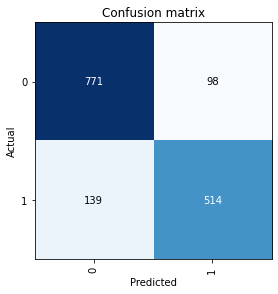

In [50]:
interpretations.plot_confusion_matrix()

In [51]:
y_test = list(target.numpy())
y_pred = preds.numpy()[:,1]

In [52]:
def get_preds_as_nparray(ds_type) -> np.ndarray:
    learn.model.roberta.eval()
    preds = learn.get_preds(ds_type)[0].detach().cpu().numpy()
    sampler = [i for i in data.dl(ds_type).sampler]
    reverse_sampler = np.argsort(sampler)
    ordered_preds = preds[reverse_sampler, :]
    pred_values = np.argmax(ordered_preds, axis=1)
    return ordered_preds, pred_values

In [53]:
df1.head()

,text
0,Just happened a terrible car crash
1,Heard about earthquake is different cities stay safe everyone
2,there is a forest fire at spot pond geese are fleeing across the street I cannot save them all
3,Apocalypse lighting Spokane wildfires
4,Typhoon Soudelor kills in China and Taiwan


In [54]:
_, test_pred_values = get_preds_as_nparray(DatasetType.Test)

In [55]:
test_pred_values

array([1, 1, 1, 1, ..., 1, 1, 1, 1])

In [56]:
df1["target"] = test_pred_values

In [57]:
df1.head(10)

,text,target
0,Just happened a terrible car crash,1
1,Heard about earthquake is different cities stay safe everyone,1
2,there is a forest fire at spot pond geese are fleeing across the street I cannot save them all,1
3,Apocalypse lighting Spokane wildfires,1
4,Typhoon Soudelor kills in China and Taiwan,1
5,We re shaking It s an earthquake,1
6,They d probably still show more life than Arsenal did yesterday eh EH,0
7,Hey How are you,0
8,What a nice hat,0
9,Fuck off,0


In [58]:
df1["target"].value_counts()

0    1989
1    1274
Name: target, dtype: int64

In [63]:
df1.to_csv('tester.csv', index=False)

In [66]:
d = pd.read_csv('/content/test.csv')
d.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [67]:
final=pd.DataFrame()
final['id']=d['id']
final['target']=df1['target']

In [68]:
final.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [71]:
final.shape

(3263, 2)

In [85]:
final.to_csv('sample.csv', index=False)